In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
churn = pd.read_csv("churn.csv")

In [5]:
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
churn.rename(columns = {'Churn?':'Churn'}, inplace = True)

In [7]:
churn.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

In [8]:
# EDA -> Find variables that some relation with churn variables
#        Remove variables that have multi-collinearity
#        missing values
#        outlier (input variables)

In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [10]:
# all the "object" datatype should be converted to int64/float64 

In [11]:
churn["Int'l Plan"].value_counts()

no     3010
yes     323
Name: Int'l Plan, dtype: int64

In [12]:
churn["Int'l Plan"] = churn["Int'l Plan"].map({'no': 0,'yes' :1 })

In [13]:
churn["VMail Plan"].value_counts()

no     2411
yes     922
Name: VMail Plan, dtype: int64

In [14]:
churn["VMail Plan"] = churn["VMail Plan"].map({'no': 0,'yes' :1 })

In [15]:
churn["Churn"].value_counts()

False.    2850
True.      483
Name: Churn, dtype: int64

In [16]:
churn["Churn"] = churn["Churn"].map({'False.': 0,'True.' :1 })

In [17]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   int64  
 5   VMail Plan      3333 non-null   int64  
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [18]:
churn = churn.drop(["State","Area Code","Phone"],axis=1)

In [19]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  3333 non-null   int64  
 1   Int'l Plan      3333 non-null   int64  
 2   VMail Plan      3333 non-null   int64  
 3   VMail Message   3333 non-null   int64  
 4   Day Mins        3333 non-null   float64
 5   Day Calls       3333 non-null   int64  
 6   Day Charge      3333 non-null   float64
 7   Eve Mins        3333 non-null   float64
 8   Eve Calls       3333 non-null   int64  
 9   Eve Charge      3333 non-null   float64
 10  Night Mins      3333 non-null   float64
 11  Night Calls     3333 non-null   int64  
 12  Night Charge    3333 non-null   float64
 13  Intl Mins       3333 non-null   float64
 14  Intl Calls      3333 non-null   int64  
 15  Intl Charge     3333 non-null   float64
 16  CustServ Calls  3333 non-null   int64  
 17  Churn           3333 non-null   i

In [20]:
churn["Churn"].value_counts(normalize=True)
# inspecting the target variable

0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [21]:
# therefore imbalanced data, ideally we should not work with this data, we should balance the data to 70:30 atleast.

<AxesSubplot: xlabel='Churn', ylabel='Account Length'>

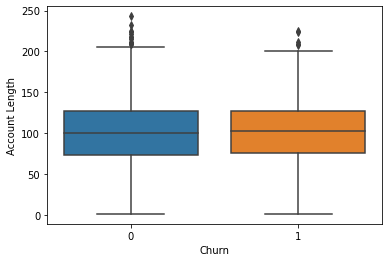

In [22]:
sns.boxplot(x = "Churn", y = "Account Length", data = churn)

<AxesSubplot: xlabel='Churn', ylabel='Day Mins'>

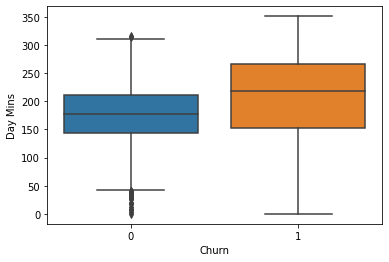

In [23]:
sns.boxplot(x = "Churn", y = "Day Mins", data = churn)

In [24]:
churn.corr()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
Account Length,1.000000,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Int'l Plan,0.024735,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
VMail Plan,0.002918,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
VMail Message,-0.004628,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Day Mins,0.006216,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Day Calls,0.038470,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Day Charge,0.006214,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Eve Mins,-0.006757,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Eve Calls,0.019260,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Eve Charge,-0.006745,0.019106,0.021559,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786


In [25]:
# interaction effect between variables : 
#     suppose one variable is not correlated to other 
#     and when two variables combined are strongly correlated with that variable 
#     we get a strong correlation
#     so this kind of effect is called interaction effect among variables

In [26]:
target = churn["Churn"]
X = churn.drop(["Churn"],axis=1)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,target,test_size=0.2,random_state=1)

In [28]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train,y_train)

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
# so this warning is because of some iterations reached limit and it failed 
# currently ignoring this warning 

In [31]:
logit.intercept_

array([-0.04304329])

In [32]:
logit.coef_

array([[-2.02955388e-03,  2.05633893e-01, -1.75457662e-02,
        -2.47877173e-02,  8.64773907e-03, -1.03398485e-02,
         1.48371235e-03,  1.44763846e-03, -1.05663068e-02,
         1.67002076e-04, -9.72042650e-04, -1.23612721e-02,
        -3.78241693e-05, -4.31979744e-03, -1.35096940e-01,
        -1.23459105e-03,  4.37618200e-01]])

In [33]:
import statsmodels.api as sm

In [34]:
# Statsmodel's default is w/o intercept, to add intercept we need to add constant
X_train_sm = sm.add_constant(X_train)
sm_model = sm.Logit(y_train,X_train_sm).fit()

Optimization terminated successfully.
         Current function value: 0.318565
         Iterations 7


In [35]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2648
Method:                           MLE   Df Model:                           17
Date:                Fri, 04 Aug 2023   Pseudo R-squ.:                  0.2285
Time:                        06:33:23   Log-Likelihood:                -849.30
converged:                       True   LL-Null:                       -1100.8
Covariance Type:            nonrobust   LLR p-value:                 4.538e-96
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.6412      0.820    -10.534      0.000     -10.249      -7.033
Account Length     0.0008      0.002      0.492      0.623      -0.002       0.004
Int'l Plan         2.0872      0.163     12.839      0.000       1.769       2.406
VMail Plan        -1.9362      0.655     -2.955      0.003      -3.221      -0.652
VMail Message      0.0326      0.020      1.597      0.110      -0.007       0.073
Day Mins          -1.2864      3.684     -0.349      0.727      -8.507       5.935
Day Calls          0.0025      0.003      0.798      0.425      -0.004       0.009
Day Charge         7.6412     21.672      0.353      0.724     -34.835      50.118
Eve Mins          -0.4609      1.838     -0.251      0.802      -4.062       3.141
Eve Calls          0.0031      0.003      0.996      0.319      -0.003       0.009
Eve Charge         5.5023     21.619      0.255      0.799     -36.870      47.874
Night Mins         0.2730      0.989      0.276      0.782      -1.665       2.211
Night Calls     5.259e-05      0.003      0.016      0.987      -0.006       0.006
Night Charge      -5.9742     21.972     -0.272      0.786     -49.039      37.090
Intl Mins         -0.0030      5.999     -0.000      1.000     -11.761      11.755
Intl Calls        -0.1196      0.029     -4.090      0.000      -0.177      -0.062
Intl Charge        0.3453     22.218      0.016      0.988     -43.202      43.893
CustServ Calls     0.5414      0.045     12.116      0.000       0.454       0.629
==================================================================================
"""

In [36]:
# there is no concept of r^2 in logistic regression, 
# but we do have psuedo r^2 similar to r^2 

In [37]:
# psuedo r^2 = (1 - (LogLikelihood(model)/LogLikelihood(null model)))

In [38]:
# from summary we can say that there are so many features whose "P>|z|" (p-value) > 0.05

In [39]:
coef_sm = pd.read_html(sm_model.summary().tables[1].as_html(),header=0,index_col=0)[0]
coef_sm

,coef,std err,z,P>|z|,[0.025,0.975]
const,-8.641200,0.820,-10.534,0.000,-10.249,-7.033
Account Length,0.000800,0.002,0.492,0.623,-0.002,0.004
Int'l Plan,2.087200,0.163,12.839,0.000,1.769,2.406
VMail Plan,-1.936200,0.655,-2.955,0.003,-3.221,-0.652
VMail Message,0.032600,0.020,1.597,0.110,-0.007,0.073
Day Mins,-1.286400,3.684,-0.349,0.727,-8.507,5.935
Day Calls,0.002500,0.003,0.798,0.425,-0.004,0.009
Day Charge,7.641200,21.672,0.353,0.724,-34.835,50.118
Eve Mins,-0.460900,1.838,-0.251,0.802,-4.062,3.141
Eve Calls,0.003100,0.003,0.996,0.319,-0.003,0.009


In [37]:
coef_sm["odds_ratio"] = np.exp(coef_sm["coef"])

In [38]:
coef_sm

,coef,std err,z,P>|z|,[0.025,0.975],odds_ratio
const,-8.641200,0.820,-10.534,0.000,-10.249,-7.033,0.000177
Account Length,0.000800,0.002,0.492,0.623,-0.002,0.004,1.000800
Int'l Plan,2.087200,0.163,12.839,0.000,1.769,2.406,8.062309
VMail Plan,-1.936200,0.655,-2.955,0.003,-3.221,-0.652,0.144251
VMail Message,0.032600,0.020,1.597,0.110,-0.007,0.073,1.033137
Day Mins,-1.286400,3.684,-0.349,0.727,-8.507,5.935,0.276264
Day Calls,0.002500,0.003,0.798,0.425,-0.004,0.009,1.002503
Day Charge,7.641200,21.672,0.353,0.724,-34.835,50.118,2082.241007
Eve Mins,-0.460900,1.838,-0.251,0.802,-4.062,3.141,0.630716
Eve Calls,0.003100,0.003,0.996,0.319,-0.003,0.009,1.003105


In [39]:
# In case of linear regression, the thetas use to represent the effect of feature on target variable
# so if one of the constant is very high, the dependency of that variable becomes higher

# here that is not the case

In [40]:
# The above summary gives the odds_ratio of every feature
# i.e. theta0 + theta1[x] + theta2[x] + theta3[x] + ... + thetam[x] = log(p/(1-p))

In [41]:
# so from the odd ratio if the magnitude is really really high
# then we can say that the impact of that feature is very high
# if the magnitude is significantly low, then impact of that feature is low
# and if the magnitude is somewhat closer to 1 -> the impact is negligible

In [42]:
# Predictions from statsmodels
X_test_sm = sm.add_constant(X_test)
pred_sm = sm_model.predict(X_test_sm)

In [43]:
pred_sm = np.where(pred_sm>0.5,1,0)

In [44]:
# Predictions from Logit model
y_pred = logit.predict(X_test)

In [45]:
# Confusion matrix for stats model
from sklearn.metrics import confusion_matrix, precision_score, recall_score
print(confusion_matrix(y_test,pred_sm))

[[551  18]
 [ 82  16]]


In [46]:
# Confusion matrix for logistic model
print(confusion_matrix(y_test,y_pred))

[[561   8]
 [ 91   7]]


In [47]:
# both of the models are not satisfactory,although among these we can say that stats model is preferable

In [48]:
# precision is correct predictions out of positive predictions, so how many predictions are right.
print("Stats Model Prediction Score:", precision_score(y_test,pred_sm))
print("Logistic Model Prediction Score:", precision_score(y_test,y_pred))

Stats Model Prediction Score: 0.47058823529411764
Logistic Model Prediction Score: 0.4666666666666667


In [49]:
# Recall score is:  of all events : how many did we predict
print("Stats Model Recall Score:", recall_score(y_test,pred_sm))
print("Logistic Model Recall Score:", recall_score(y_test,y_pred))

Stats Model Recall Score: 0.16326530612244897
Logistic Model Recall Score: 0.07142857142857142


In [50]:
# Which is better? precision score or recall score -> it depends on what business problem we are solving
# in below image : the first scenario is for patients having cancer : 
# The false positive are 2 hence -> tested and result is negative but the prediction was positive -> this is not a major problem
# but in case of false negative 80 -> tested and result is positive but the prediction was negative -> this is a severe proeblem
# so in this case False positive (FP) is moderately okay, but false negative is not at all acceptable

# In the second scenario consider the manager wants to spend some potential money and wants to convert in their business
# so the false positive is 400 -> 400 people were supposed to convert as prediction is positive but the reality is they didnt
                            #  -> major problem as cost of 400 people is heavy
                            #  -> secondly, 80 people who are converted already to bussinesss but on prediction, we found that they didnt
                            #  -> not a major problem

![](4.png)

In [51]:
# when prcision and recall are equally important we use f1 score

In [52]:
# Why 0.5 cutoff?
# how do we compare models? 

In [53]:
# suppose we change the cutoff to 0.3 therefore if there are 30% chances of man to churn, we will consider them to predict churn
pred_0_3 = np.where(pred_sm>0.3,1,0)
print("Stats model with 0.3 cutoff")
print(confusion_matrix(y_test,pred_0_3))

Stats model with 0.3 cutoff
[[551  18]
 [ 82  16]]


In [54]:
print(precision_score(y_test,pred_0_3))
print(recall_score(y_test,pred_0_3))

0.47058823529411764
0.16326530612244897


In [55]:
# there is not a drastic change here, but there are high chances of major changes here, so we need to 
# find the correct value of cutoff in case of classification problem
# for this we have ROC-AUC curve

In [57]:
# 1 20 notebook

![](5.png)

In [58]:
from sklearn.metrics import roc_curve,auc

In [59]:
# Roc graph and auc of logit model

y_pred_prob = logit.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1],pos_label=1)
roc_auc = auc(fpr,tpr)

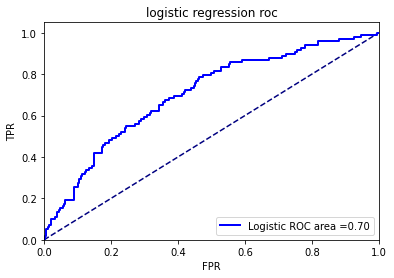

In [60]:
# ROC Graph of logit model
plt.figure()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot([0,1],[0,1],color="navy",linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title("logistic regression roc")
plt.plot(fpr,tpr,color="blue",lw=2,label="Logistic ROC area =%0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [61]:
# Roc graph and auc of stats model

y_pred_sm = sm_model.predict(X_test_sm)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_sm,pos_label=1)
roc_auc_sm = auc(fpr,tpr)

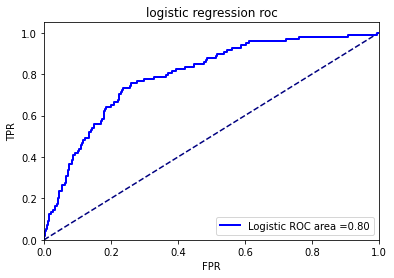

In [62]:
# ROC Graph of logit model
plt.figure()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot([0,1],[0,1],color="navy",linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title("logistic regression roc")
plt.plot(fpr,tpr,color="blue",lw=2,label="Logistic ROC area =%0.2f" % roc_auc_sm)
plt.legend(loc="lower right")
plt.show()

In [63]:
# for stats model it is 0.8 hence stats mode is great

In [64]:
# variables selected (just by intuition from stats model) 
# other variables is having multi-collinearity problem or they are generating noise in predicting model
cols = ["Day Mins","Eve Mins","CustServ Calls", "Int'l Plan","VMail Message"]
X_trainV2 = X_train[cols]
X_testV2 = X_test[cols]

X_trainV2.columns

Index(['Day Mins', 'Eve Mins', 'CustServ Calls', 'Int'l Plan',
       'VMail Message'],
      dtype='object')

In [67]:
log_model = LogisticRegression() # we the warning is also gone
log_model.fit(X_trainV2,y_train)

LogisticRegression()

In [68]:
log_model.coef_

array([[ 0.01212987,  0.00613339,  0.5197262 ,  2.00663606, -0.02658273]])

In [69]:
coef = np.array(log_model.coef_)
coef = coef.reshape([len(cols),])
var_coef = pd.DataFrame({"Vars":cols,"coef":coef})
var_coef["odds ratio"] = np.exp(var_coef["coef"])

In [70]:
var_coef

,Vars,coef,odds ratio
0,Day Mins,0.012130,1.012204
1,Eve Mins,0.006133,1.006152
2,CustServ Calls,0.519726,1.681567
3,Int'l Plan,2.006636,7.438253
4,VMail Message,-0.026583,0.973767


In [71]:
predV2 = log_model.predict(X_testV2) # cutoff = 0.5
confusion_matrix(y_test,predV2)

array([[556,  13],
       [ 86,  12]], dtype=int64)

In [72]:
probV2 = log_model.predict_proba(X_testV2)

In [74]:
predV2_03 = np.where(probV2[:,1]>0.3,1,0)
confusion_matrix(y_test,predV2_03)

array([[513,  56],
       [ 68,  30]], dtype=int64)

In [75]:
precision_score(y_test,predV2_03)

0.3488372093023256

In [76]:
recall_score(y_test,predV2_03)

0.30612244897959184

In [77]:
# ROC graph and AUC
fprV2,tprV2,thresholdsV2 = roc_curve(y_test,probV2[:,1],pos_label=1)
roc_aucV2 = auc(fprV2,tprV2)

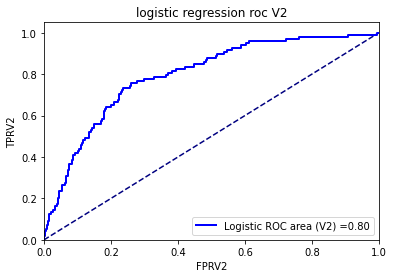

In [78]:
# ROC Graph of logit model
plt.figure()
plt.xlabel("FPRV2")
plt.ylabel("TPRV2")
plt.plot([0,1],[0,1],color="navy",linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title("logistic regression roc V2")
plt.plot(fpr,tpr,color="blue",lw=2,label="Logistic ROC area (V2) =%0.2f" % roc_aucV2)
plt.legend(loc="lower right")
plt.show()

In [89]:
# so with few variables also we can acheive same score i.e. 0.8 so this a better model compared to the previous models

In [90]:
# 1:52 logistic regressioin 2 notebook

In [79]:
from sklearn.metrics import precision_recall_curve

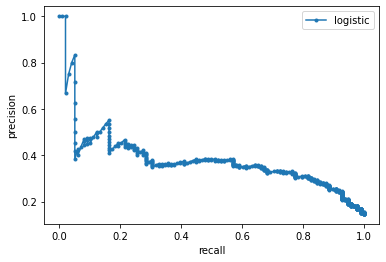

In [80]:
precision, recall, thresholds = precision_recall_curve(y_test,probV2[:,1])
plt.plot(recall,precision,marker='.',label='logistic')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()
plt.show()

![](6.png)

In [87]:
def pcurve(probs, actuals, cuts = np.arange(0.05,0.95,0.05)):
    precision = np.zeros(len(cuts))
    recall = np.zeros(len(cuts))

    for i in np.arange(len(cuts)):
        temp_preds = np.where(probV2[:,1]>cuts[i],1,0)
        precision[i] = precision_score(actuals,temp_preds)
        recall[i] = recall_score(actuals,temp_preds)
    
    fig,ax = plt.subplots(figsize=[15,8])
    plt.plot(recall,precision,marker='o',linestyle='dashed',label=cuts)
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.title("Precision vs Recall")

    for x,y,z in zip(recall,precision,cuts):
        label = "{:.2f}".format(z)

        plt.annotate(label, # this is text
                     (x,y), # this is point to label
                     textcoords="offset points", # how to position the text
                     xytext = (0,5), # distance from text to points (x,y)
                     ha = "center")
    # return precision, recall, cuts

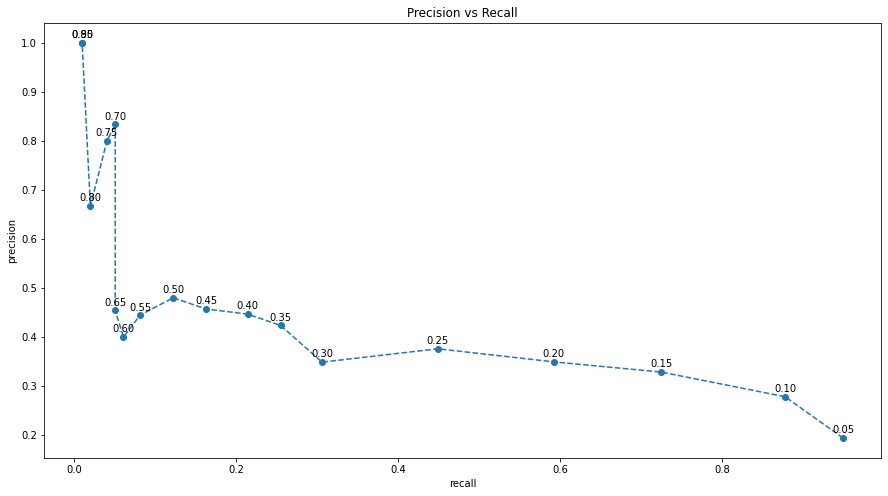

In [88]:
pcurve(probV2,y_test)

In [89]:
# based on requirement of model, if we want high recall 
# we select cutoff as 0.1 and if we want high precision, we select cutoff as 0.7 maybe 
# hence on the businesss requirement, the cutoff is selected

In [90]:
# what are the other factors to predict whether the model is fair or not
# so basically, there are different charts/analysis which could help to solve the problem

# so first is benchmark
# so for example there benchmark that 5 internationall calls
# per day would not have a chance of churning
# so this benchmark would potentially help us a lot

In [92]:
chart_data = X_test[cols]
chart_data["prob"] = probV2[:,1]
chart_data.head()

C:\Users\parth\AppData\Local\Temp\ipykernel_13404\1111849288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart_data["prob"] = probV2[:,1]


,Day Mins,Eve Mins,CustServ Calls,Int'l Plan,VMail Message,prob
2360,222.1,199.4,2,0,0,0.183993
600,102.6,246.0,2,0,0,0.065790
1501,272.4,107.9,0,0,0,0.077269
1114,165.1,267.0,1,0,15,0.063878
517,214.7,158.6,2,0,0,0.138294


![](7.png)

In [94]:
chart_data = chart_data.sort_values(by="prob",ascending=False)

In [95]:
chart_data.head()

,Day Mins,Eve Mins,CustServ Calls,Int'l Plan,VMail Message,prob
2732,216.2,363.7,5,1,0,0.953133
546,279.8,248.7,2,1,0,0.820447
1044,243.2,147.0,4,1,0,0.816245
3255,286.2,187.2,2,1,0,0.772030
3304,186.1,198.6,4,1,0,0.753056


In [96]:
chart_data.shape

(667, 6)

In [97]:
chart_data["decile"] = pd.qcut(chart_data["prob"],10)

In [98]:
chart_data.head()

,Day Mins,Eve Mins,CustServ Calls,Int'l Plan,VMail Message,prob,decile
2732,216.2,363.7,5,1,0,0.953133,"(0.337, 0.953]"
546,279.8,248.7,2,1,0,0.820447,"(0.337, 0.953]"
1044,243.2,147.0,4,1,0,0.816245,"(0.337, 0.953]"
3255,286.2,187.2,2,1,0,0.772030,"(0.337, 0.953]"
3304,186.1,198.6,4,1,0,0.753056,"(0.337, 0.953]"


In [99]:
chart_data["row"] = np.arange(1,chart_data.shape[0]+1)

In [100]:
chart_data.head()

,Day Mins,Eve Mins,CustServ Calls,Int'l Plan,VMail Message,prob,decile,row
2732,216.2,363.7,5,1,0,0.953133,"(0.337, 0.953]",1
546,279.8,248.7,2,1,0,0.820447,"(0.337, 0.953]",2
1044,243.2,147.0,4,1,0,0.816245,"(0.337, 0.953]",3
3255,286.2,187.2,2,1,0,0.772030,"(0.337, 0.953]",4
3304,186.1,198.6,4,1,0,0.753056,"(0.337, 0.953]",5


In [101]:
chart_data["decile1"] = np.ceil(chart_data["row"]/((chart_data.shape[0]+1)/10))

In [102]:
chart_data.head()

,Day Mins,Eve Mins,CustServ Calls,Int'l Plan,VMail Message,prob,decile,row,decile1
2732,216.2,363.7,5,1,0,0.953133,"(0.337, 0.953]",1,1.0
546,279.8,248.7,2,1,0,0.820447,"(0.337, 0.953]",2,1.0
1044,243.2,147.0,4,1,0,0.816245,"(0.337, 0.953]",3,1.0
3255,286.2,187.2,2,1,0,0.772030,"(0.337, 0.953]",4,1.0
3304,186.1,198.6,4,1,0,0.753056,"(0.337, 0.953]",5,1.0


In [103]:
chart_data["decile1"].value_counts()

2.0     67
3.0     67
4.0     67
5.0     67
7.0     67
8.0     67
9.0     67
1.0     66
6.0     66
10.0    66
Name: decile1, dtype: int64

In [104]:
chart_data["target"] = y_test

In [105]:
chart_data.head()

,Day Mins,Eve Mins,CustServ Calls,Int'l Plan,VMail Message,prob,decile,row,decile1,target
2732,216.2,363.7,5,1,0,0.953133,"(0.337, 0.953]",1,1.0,1
546,279.8,248.7,2,1,0,0.820447,"(0.337, 0.953]",2,1.0,1
1044,243.2,147.0,4,1,0,0.816245,"(0.337, 0.953]",3,1.0,0
3255,286.2,187.2,2,1,0,0.772030,"(0.337, 0.953]",4,1.0,1
3304,186.1,198.6,4,1,0,0.753056,"(0.337, 0.953]",5,1.0,1


In [107]:
lift = chart_data.groupby("decile1").agg( #group by deciles of predicted probabilities
    [
    "count", # the total number of customers (data points) in the decile
    "sum", # the total number of bad customers (Risk -1)
    ]
)["target"].sort_index(ascending=True)
lift.columns = ["Number of customers","Number of left customers"]
lift["Cumulativel left"] = lift["Number of left customers"].cumsum()
lift["Percent of Events"] = lift["Number of left customers"]/lift["Number of left customers"].sum()*100
lift["Gain"] = lift["Percent of Events"].cumsum()
lift["Lift"] = lift["Gain"]/np.array(range(10,100+10,10))
lift.head(10)

C:\Users\parth\AppData\Local\Temp\ipykernel_13404\201247181.py:1: FutureWarning: ['decile'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  lift = chart_data.groupby("decile1").agg( #group by deciles of predicted probabilities


,Number of customers,Number of left customers,Cumulativel left,Percent of Events,Gain,Lift
decile1,,,,,,
1.0,66,27,27,27.551020,27.551020,2.755102
2.0,67,23,50,23.469388,51.020408,2.551020
3.0,67,17,67,17.346939,68.367347,2.278912
4.0,67,14,81,14.285714,82.653061,2.066327
5.0,67,6,87,6.122449,88.775510,1.775510
6.0,66,4,91,4.081633,92.857143,1.547619
7.0,67,2,93,2.040816,94.897959,1.355685
8.0,67,3,96,3.061224,97.959184,1.224490
9.0,67,1,97,1.020408,98.979592,1.099773


<AxesSubplot: xlabel='decile1', ylabel='count'>

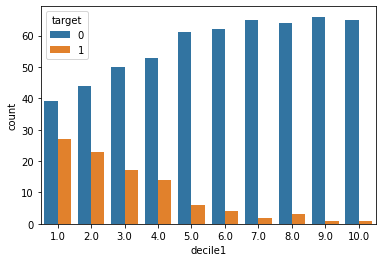

In [108]:
sns.countplot(x = "decile1",hue="target",data=chart_data)

![](8.png)

In [110]:
# precision: number of times your predicted is correct 
#            therefore I Predicted in above example that it will rain two times(wednesday and thursday) 
#            but truly it rained only once(wednesday)
#            therfore precision is 1/2
#            number of times you predicted and how many times you were correct

# for recall -> truly it rained two times(wednesday and friday),    
#               and out of that how many times you predicted that it would rain(only wednesday)
#             therefore recall is (1/2)
#             out of all the events happened -> how many you were able to pick 